Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


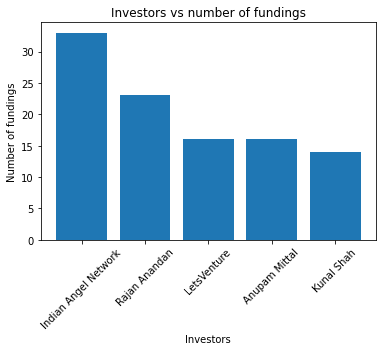

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import csv
#importing the libraries
from heapq import nlargest 
#importing heapq for finding max value from the dictionary later
file_obj=open('startup_funding.csv',encoding='utf-8')
df=pd.read_csv(file_obj)

df=df[["InvestorsName",'StartupName','InvestmentType']]
#making dataframe of required columns
df["StartupName"]=df["StartupName"].replace('Flipkart.com','Flipkart')
df["StartupName"]=df["StartupName"].replace('Olacabs','Ola')
df["StartupName"]=df["StartupName"].replace('Ola Cabs','Ola')
df["StartupName"]=df["StartupName"].replace('Oyo Rooms','Oyo')
df["StartupName"]=df["StartupName"].replace('OyoRooms','Oyo')
df["StartupName"]=df["StartupName"].replace('Oyorooms','Oyo')
df["StartupName"]=df["StartupName"].replace('Paytm Marketplace','Paytm')
df["InvestmentType"]=df["InvestmentType"].replace('SeedFunding','Seed Funding')
df["InvestmentType"]=df["InvestmentType"].replace('PrivateEquity','Private Equity')
df["InvestmentType"]=df["InvestmentType"].replace('Crowd funding','Crowd Funding')
#replacing values where required ,for correct result
y=df['InvestmentType']=='Crowd Funding'

k=df['InvestmentType']=='Seed Funding'
df1=df[k|y]
#Applying the boolean conditions to df to get the investment type Crowd or Seed Funding
df1=df1[["StartupName","InvestorsName"]]
#slicing data frame to just get the startupname and Investor name.
df1.dropna(inplace=True)
unique=df["StartupName"].unique()
#made unique array to find unique satrtup names on the basis of which we can find investor name
Investor=[]
for values in unique:
    s=set()
    x=df1[df1["StartupName"]==values]["InvestorsName"].values
    #getting the value corresponding to each startupname
    #getting value of the all of  investor name correspoding to a single startup name at a time  
   
    for investors in x:
        xtra=investors.split(",")
         #splitting differnt values of investor from each other and storing int an array

        for i in xtra:
            if i!="" and i!="Undisclosed Investors" and i!="Undisclosed investors":#removing empty values . only non empty values will be put int the set

                s.add(i.strip())#adding value in a set to avoid repetition as set adds only unique values (singe value of investor for one startup) and stripping them of extra space

    for i in s:   
        Investor.append(i)
         #appending the final set in a list
key=0
d={}
for k in Investor:
    
    if k in d:
        d[k]+=1
    else :
        d[k]=1
 #using dictionary to find the frequency of each startup        
Top5 = nlargest(5, d, key = d.get)

#using nlargest method to get top 5 values from a dictionary \
x=[]
y=[]
for i in Top5:
    x.append(i)
    y.append(d.get(i))
    print(i,d.get(i))

plt.bar(x,y)
plt.xticks(rotation=45)
plt.xlabel("Investors")
plt.ylabel("Number of fundings")
plt.title("Investors vs number of fundings")
plt.show()
#plotting a bar graph of City and its relation with number of fundings
